In [50]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import json
from tensorflow_addons.callbacks import TQDMProgressBar
import matplotlib.pyplot as plt

In [93]:
def history_plot(*args, metric='loss'):
    if len(args) > 1:
        sum_list = []
        for x in args:
            sum_list += x.history[metric]
        val_sum_list = []
        for x in args:
            val_sum_list += x.history['val_' + metric]
        plt.plot(sum_list)
        plt.plot(val_sum_list)
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    else:
        history = args[0]
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [30]:
def to_one_hot(x):
    return label_binarize(x, classes=range(149)).flatten()

In [31]:
def id_prep(ser):
    aslists = [json.loads(x) for x in ser.values]
    return np.array([to_one_hot(comp) for comp in aslists])

In [11]:
df = pd.read_csv('composition_scrape_ids.csv')

In [12]:
df.champion_ids.values

array(['[20, 96, 146, 47, 67]', '[107, 57, 140, 8, 142]',
       '[119, 132, 31, 46, 111]', ..., '[86, 21, 130, 27, 77]',
       '[20, 25, 140, 66, 111]', '[91, 82, 2, 125, 67]'], dtype=object)

In [33]:
X = id_prep(df.champion_ids)

In [38]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=100)

In [39]:
X_train.shape

(8640, 745)

In [41]:
encoding_dim = 16
input_comp = tf.keras.layers.Input(shape=(745,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_comp)
decoded = tf.keras.layers.Dense(745, activation='sigmoid')(encoded)

autoencoder = tf.keras.models.Model(input_comp, decoded)

In [59]:
optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01, rho=0.95, epsilon=1e-07, name="Adadelta")

In [60]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [61]:
tqdm_callback = TQDMProgressBar(show_epoch_progress=False)

In [97]:
history5 = autoencoder.fit(X_train, X_train,
                    epochs=1000,
                    batch_size=256,
                    shuffle=True,
                    verbose=0,
                    validation_data=(X_test, X_test),
                    callbacks=[tqdm_callback])

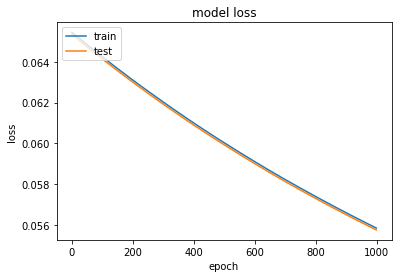

In [98]:
history_plot(history5)

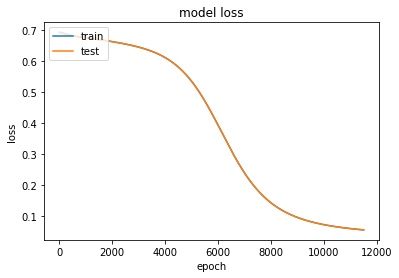

In [139]:
history_plot(history2, history3, history4, history5)

In [140]:
autoencoder.save('saved_models/autoencoder_11500')

INFO:tensorflow:Assets written to: saved_models/autoencoder_11500/assets


In [141]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 745)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                11936     
_________________________________________________________________
dense_2 (Dense)              (None, 745)               12665     
Total params: 24,601
Trainable params: 24,601
Non-trainable params: 0
_________________________________________________________________
